<a href="https://colab.research.google.com/github/Prajakta1828D/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Introduction**

---


Hotel industry is a very volatile industry and the bookings depend on variety of factors such as type of hotels, seasonality, days of week and many more. This makes analyzing the patterns available in the past data more important to help the hotels plan better. Using the historical data, hotels can perform various campaigns to boost the business. We can use the patterns to predict the future bookings using time series or decision trees.

We will be using the data available to analyze the factors affecting the hotel bookings. These factors can be used for reporting the trends and predict the future bookings.

# **Explore and Analyze the data**

---



In [ ]:
# Let us begin with importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
data.shape

(119390, 32)

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Cleaning Data**

---



Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \ 1) Remove duplicate rows \ 2) Handling missing values. \ 3) Convert columns to appropriate datatypes. \ 4) Adding important columns


# **Step 1: Removing duplicate rows if any**





In [ ]:
data[data.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(31994, 32)

In [ ]:
# Dropping duplicate values
data.drop_duplicates(inplace = True)
data.shape

(87396, 32)

# **Step2: Handling missing values.**

In [ ]:
# Columns having missing values.
data.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \ We will replace null values by 0 in these columns

In [ ]:
data[['company','agent']] = data[['company','agent']].fillna(0)
data['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \ So, 'nan' values are the missing values due to error of recording data. \ \ We will replace the null values under this column with mean value of children.

In [ ]:
data['children'].fillna(data['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer. \ Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [ ]:
data['country'].fillna('others', inplace = True)

In [ ]:
# Checking if all null values are removed
data.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [ ]:
data[data['adults']+data['babies']+data['children'] == 0].shape

(166, 32)

In [ ]:
data.drop(data[data['adults']+data['babies']+data['children'] == 0].index, inplace = True)


# **Step 3: Converting columns to appropriate datatypes**

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
data[['children', 'company', 'agent']] = data[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%Y-%m-%d')

# **Step 4: Adding important columns.**

In [ ]:
# Adding total staying days in hotels
data['total_stay'] = data['stays_in_weekend_nights']+data['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
data['total_people'] = data['adults']+data['children']+data['babies']

We are adding this column so that we can analyse the stay length at hotels

# **Exploratory Data Analysis**

---



In [ ]:
#correlation
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
is_canceled,1.000000,0.184515,0.088020,0.001691,0.005449,0.060992,0.084159,0.080271,0.067182,-0.020627,...,-0.052178,-0.093236,-0.001145,-0.075314,0.004710,0.127233,-0.184456,-0.120794,0.085431,0.098987
lead_time,0.184515,1.000000,0.139408,0.101295,0.009899,0.236316,0.312506,0.139033,0.028395,-0.003705,...,-0.079021,0.080822,0.080007,-0.078938,0.131909,0.021948,-0.086736,0.034048,0.320914,0.125262
arrival_date_year,0.088020,0.139408,1.000000,-0.513895,-0.009872,0.005277,0.003765,0.038744,0.041178,-0.023366,...,0.027266,0.008944,-0.002138,0.021289,-0.027490,0.176594,-0.040041,0.064210,0.004776,0.050902
arrival_date_week_number,0.001691,0.101295,-0.513895,1.000000,0.093273,0.027466,0.028498,0.025322,0.013542,0.014302,...,-0.020938,0.012943,0.019724,-0.022852,0.013159,0.099092,0.009054,0.046759,0.031480,0.029802
arrival_date_day_of_month,0.005449,0.009899,-0.009872,0.093273,1.000000,-0.017636,-0.028375,-0.001235,0.015826,-0.000397,...,0.000148,0.007006,0.006084,-0.000598,0.006088,0.022682,0.009040,-0.001677,-0.027707,0.008110
stays_in_weekend_nights,0.060992,0.236316,0.005277,0.027466,-0.017636,1.000000,0.550471,0.091450,0.028911,0.013802,...,-0.056891,0.034624,0.159637,-0.091615,-0.031980,0.040417,-0.042979,0.032816,0.783929,0.090638
stays_in_week_nights,0.084159,0.312506,0.003765,0.028498,-0.028375,0.550471,1.000000,0.099323,0.030936,0.016201,...,-0.058714,0.066425,0.191991,-0.067063,0.001855,0.055084,-0.044484,0.038336,0.949850,0.098348
adults,0.080271,0.139033,0.038744,0.025322,-0.001235,0.091450,0.099323,1.000000,0.022171,0.016236,...,-0.122105,-0.036446,0.027577,-0.174641,-0.014925,0.241996,0.007015,0.112509,0.108117,0.801991
children,0.067182,0.028395,0.041178,0.013542,0.015826,0.028911,0.030936,0.022171,1.000000,0.017370,...,-0.029446,0.033409,0.041831,-0.051007,-0.020370,0.326359,0.036267,0.044503,0.033835,0.597392
babies,-0.020627,-0.003705,-0.023366,0.014302,-0.000397,0.013802,0.016201,0.016236,0.017370,1.000000,...,-0.009199,0.083425,0.028895,-0.011402,-0.006825,0.023206,0.030873,0.094857,0.017218,0.166709


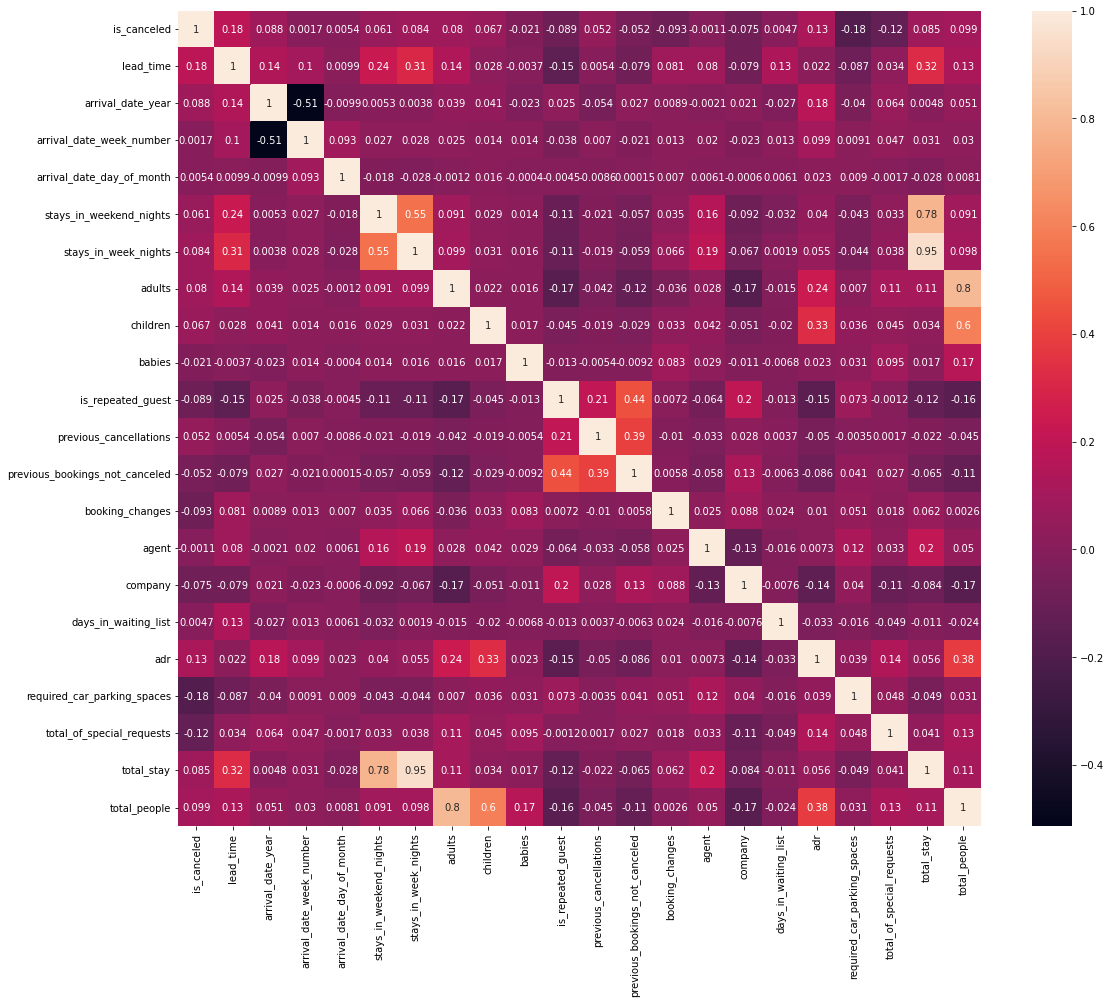

In [ ]:
#correlation map
plt.figure(figsize=(18, 15))
_ = sns.heatmap(data.corr(), annot=True)

**Correlation Conclusion:**
1. It can be observed arrival_date_week_number and arrival_date_year are 54% negative correlated
2. Company and agent are positive correlated by 35%
3. adr and children are positive correlated by 32%

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


# **1. Find percentage of available types of hotel?**

Text(0.5, 1.0, 'Available types of hotel')

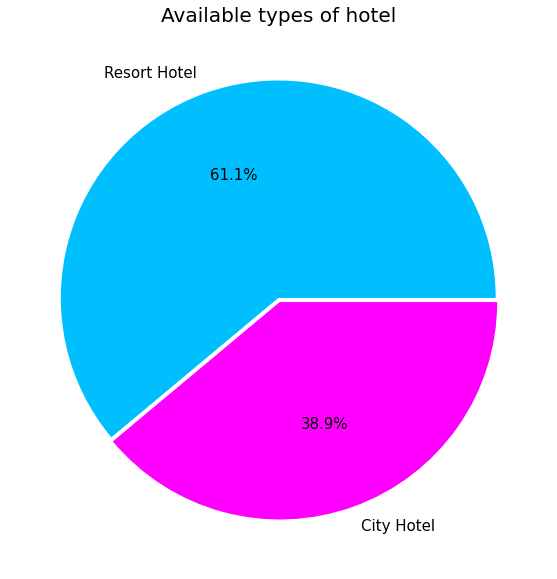

In [ ]:
Type_data=data['hotel'].value_counts()
labels = ['Resort Hotel', 'City Hotel']
plt.figure(figsize=(10,10))
colors = ['deepskyblue','magenta']
plt.pie(Type_data, labels = labels, autopct='%1.1f%%', colors=colors,explode=(0.01,0.01),textprops={'fontsize': 15})
plt.title('Available types of hotel',size=20,loc='center')

**Insights**

Resort hotel has almost double percentage than city hotel.

# **2. Find number of bookings in perticular month?**

Text(0.5, 1.0, 'Number of booking in perticular month')

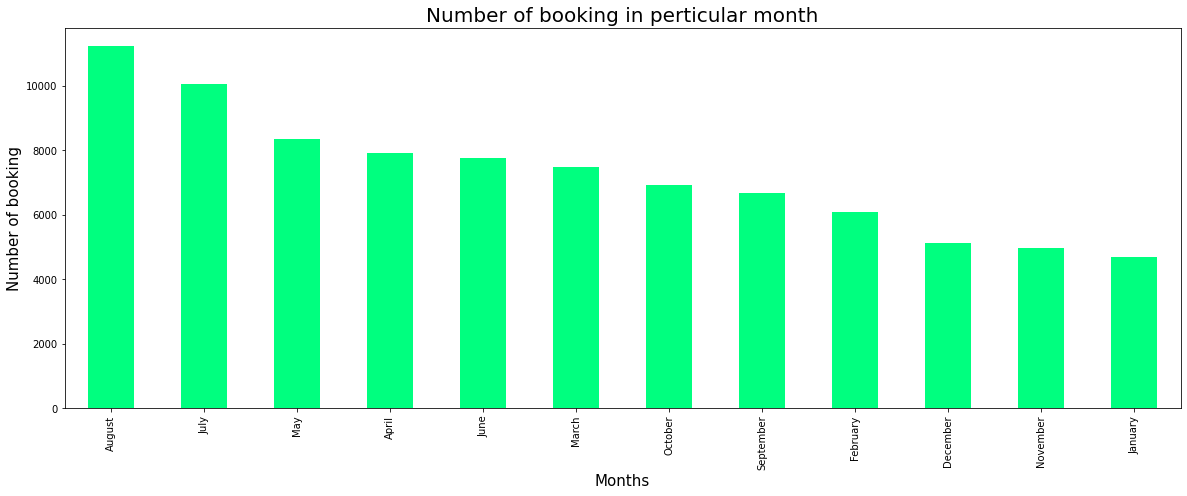

In [ ]:
plt.figure(figsize=(20,7))
data_arrival_month=data['arrival_date_month'].value_counts()
data_arrival_month.plot.bar(color='springgreen')
plt.xlabel("Months",fontsize =15)
plt.ylabel("Number of booking",fontsize =15)
plt.title("Number of booking in perticular month",fontsize =20)

**Insights**

August month has highest number of booking and january month has lowest number of booking.

# **3. Find number of bookings in perticular year?**

Text(0.5, 1.0, 'Year wise distribution of number of booking')

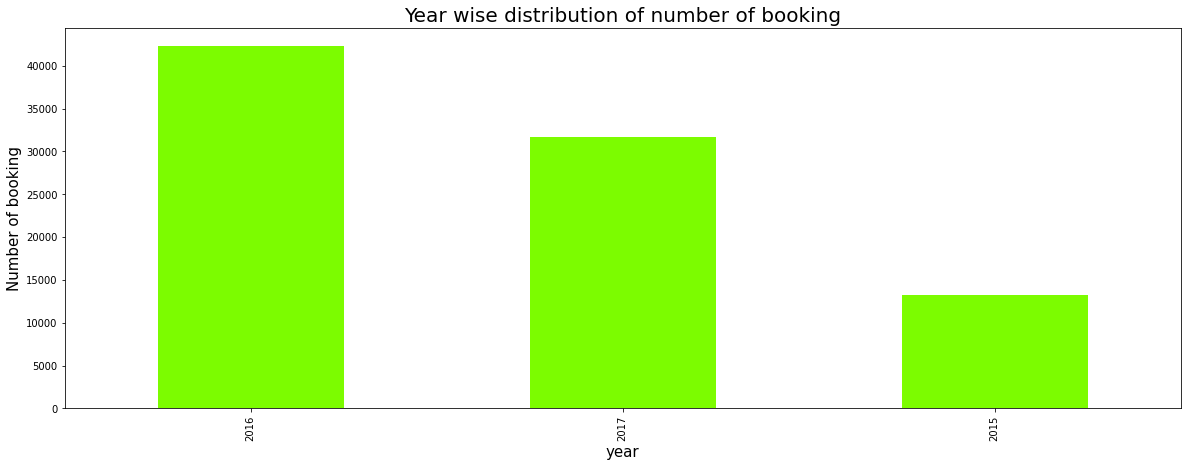

In [ ]:
plt.figure(figsize=(20,7))
data_arrival_year=data['arrival_date_year'].value_counts()
data_arrival_year.plot.bar(color='lawngreen')
plt.xlabel("year",fontsize =15)
plt.ylabel("Number of booking",fontsize =15)
plt.title("Year wise distribution of number of booking",fontsize =20)

**Insights**

2016 has higher bookings than 2015 and 2017.

From 2015 number of bookings increases in 2016 but booking decreases in 2017.

# **4. Find number of bookings vs mode of bookings?**

Text(0.5, 1.0, 'Number of booking vs mode of booking')

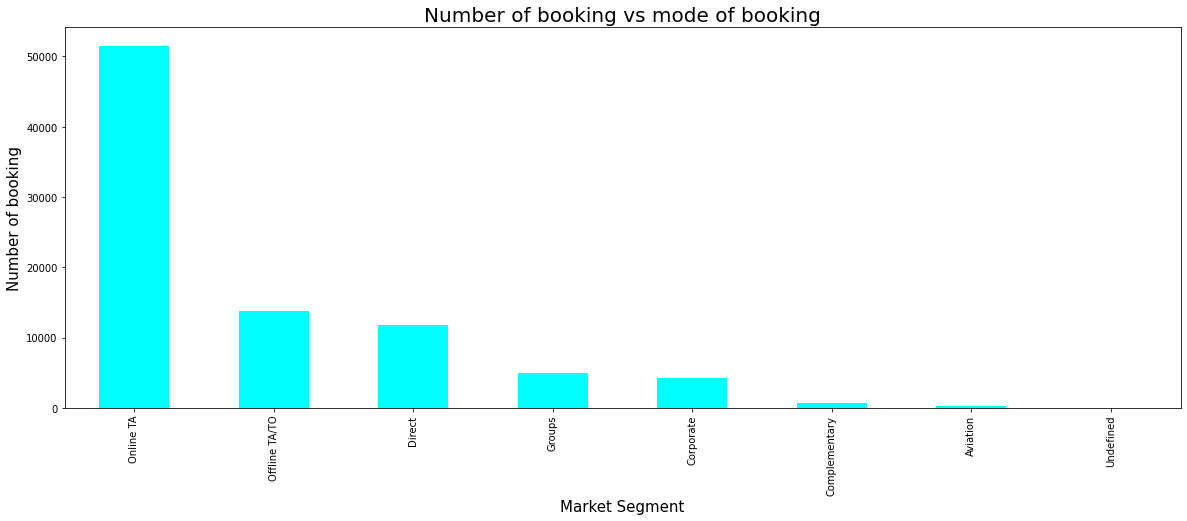

In [ ]:
plt.figure(figsize=(20,7))
data_market_segment=data['market_segment'].value_counts()
data_market_segment.plot.bar(color='cyan')
plt.xlabel("Market Segment",fontsize =15)
plt.ylabel("Number of booking",fontsize =15)
plt.title("Number of booking vs mode of booking",fontsize =20)

**Insights**

From above graph we can say that Online booking has almost same as sum of other mode of bookings.


# **5. Which room type is in most demand and which room type generate highest adr?**

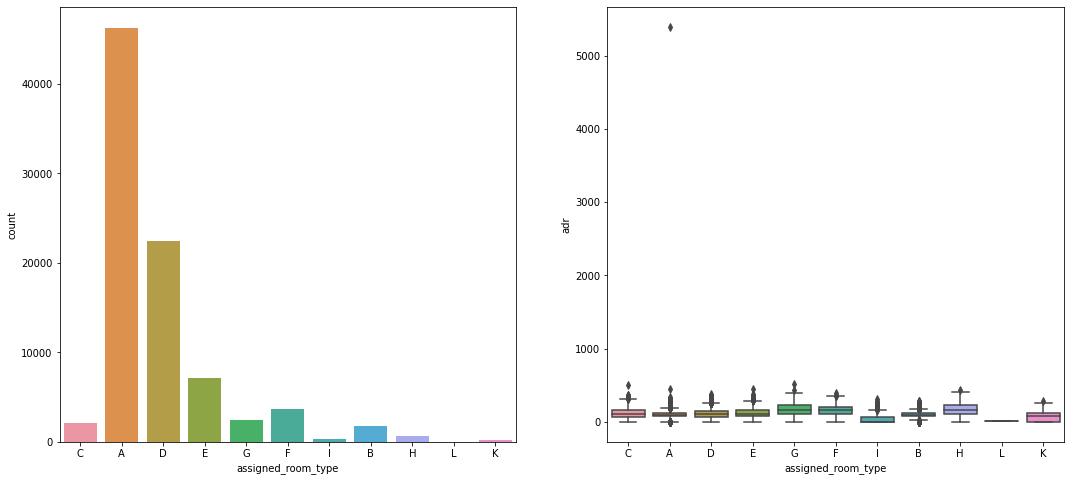

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = data.groupby('assigned_room_type')
data['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = data['assigned_room_type'])
sns.boxplot(ax = axes[1], x = data['assigned_room_type'], y = data['adr'])
plt.show()

 **Insights**
 
Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue

## **6. Find some insights in Country wise booking.** 


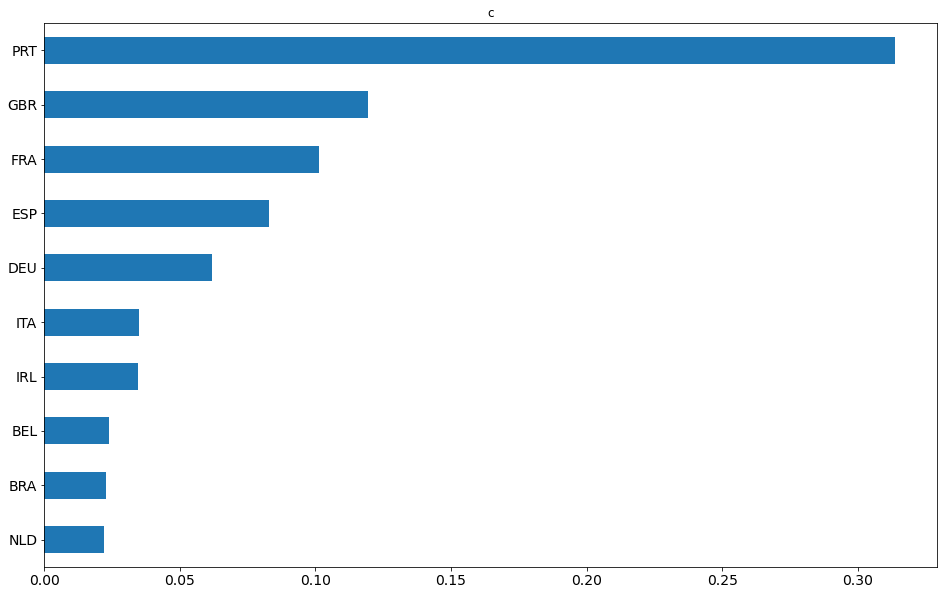

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(16, 10)) 
_ = data['country'].value_counts(normalize=True).head(10).sort_values(ascending=True).plot(kind = 'barh', title='c', fontsize=14)

**Insights**

PRT has highest number of booking

# **7. Find Number of booking and cancellation from that booking.**

[Text(0.5, 1.0, 'The Booking Status in the Hospitality Industry')]

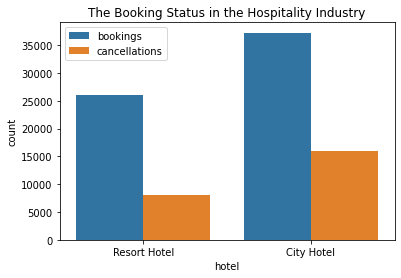

<Figure size 1440x504 with 0 Axes>

In [ ]:
data_cancellation = sns.countplot(data=data, x='hotel', hue='is_canceled')
plt.figure(figsize=(20,7))
data_cancellation.legend(['bookings','cancellations'])
data_cancellation.set(title='The Booking Status in the Hospitality Industry')

**Insights**

Resort hotel has maximum cancellation than city hotel.

# **8.Which agent makes most no. of bookings?**

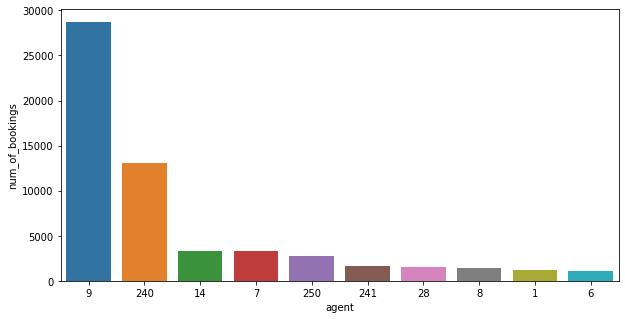

In [ ]:
d1 = pd.DataFrame(data['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

**Insights**

Agent no. 9 has made most no. of bookings

# **9.which countries most of the customers visit these hotels?**

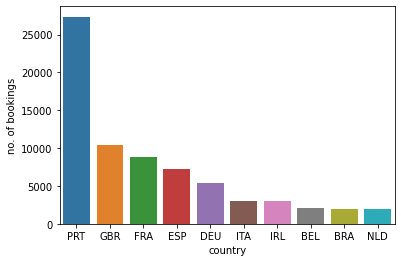

In [ ]:
grp_by_country = data.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

**Insights**

Most of the customers come from Portugal, Great Britain, France and Spain.

# **10.What is preferred stay in each hotel?**

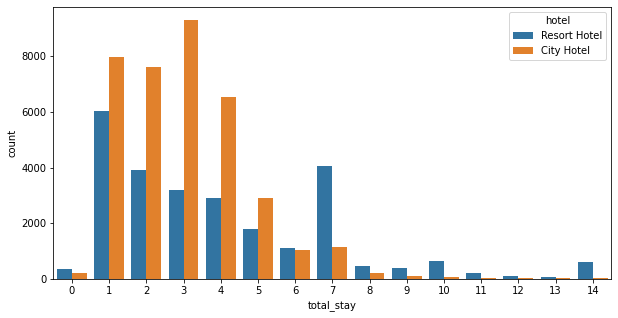

In [ ]:
not_canceled = data[data['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

**Insights**

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

# **11.Which hotel has higher bookings cancellation rate.**

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = data[data['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = data.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16035,53274,30.10
Resort Hotel,7974,33956,23.48


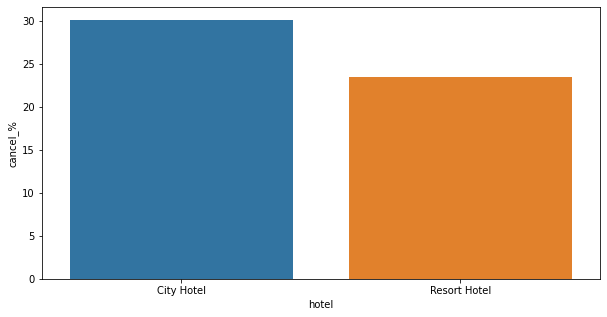

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

**Insights**

Almost 30 % of City Hotel bookings got canceled.

# **12.Which channel is mostly used for early booking of hotels?**

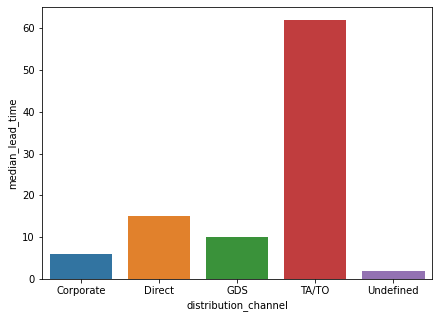

In [ ]:
group_by_dc = data.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

**Insights**

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

# **13.Which distribution channel brings better revenue generating deals for hotels?**

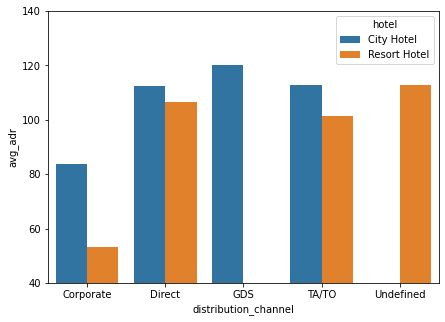

In [ ]:
group_by_dc_hotel = data.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

**Insights**

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

# **14.check the trend of arrival_num and avg adr for each day of month.**

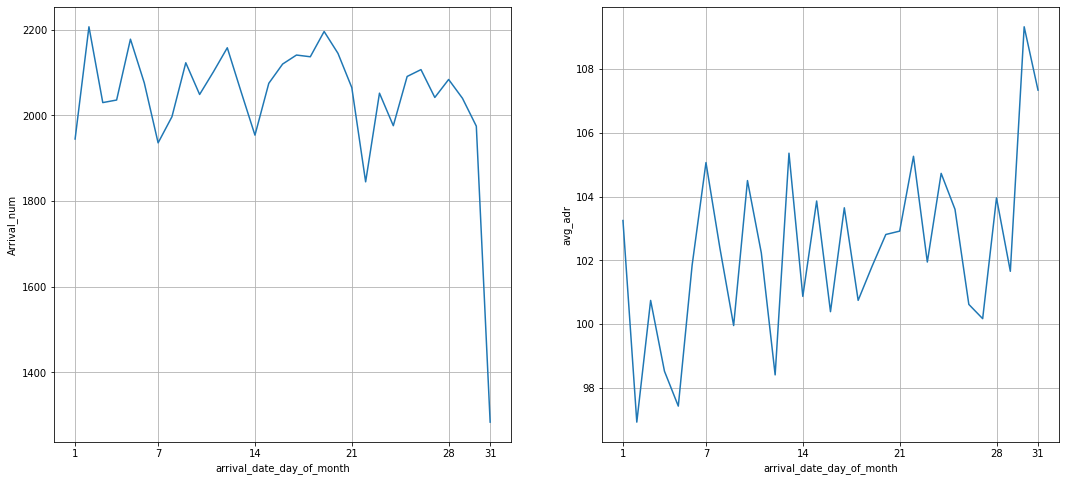

In [ ]:
d6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g = sns.lineplot(ax = axes[0],x = d6.index, y = d6['Arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h = sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()

**Insights**

We can see that graph Arrival_num has small peaks at regular interval of days. This can be due to increase in arrival weekend.\ \ Also the avg adr tends to go up as month ends. Therefore charge more at the end of month.

# **15.Divide our customers in three categories of single, couple and family/friends. then check their booking %**

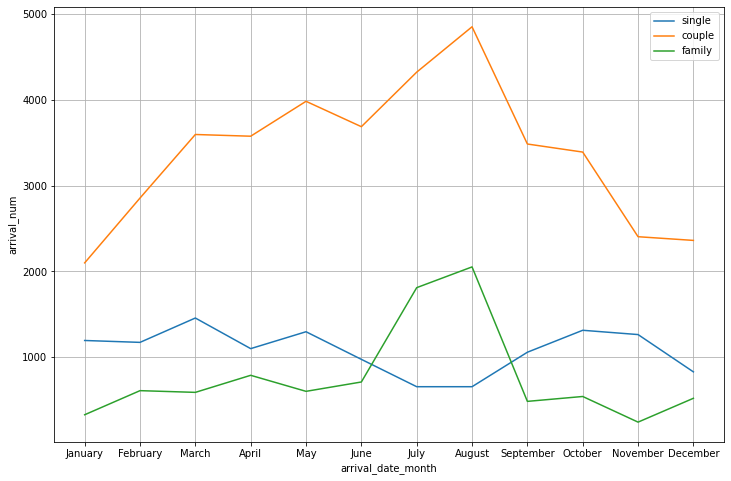

In [ ]:
## Select single, couple, multiple adults and family
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

**Insights**

Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that)

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

# **16.what causes the cancelation of bookings of rooms by customers \ \ One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings.**

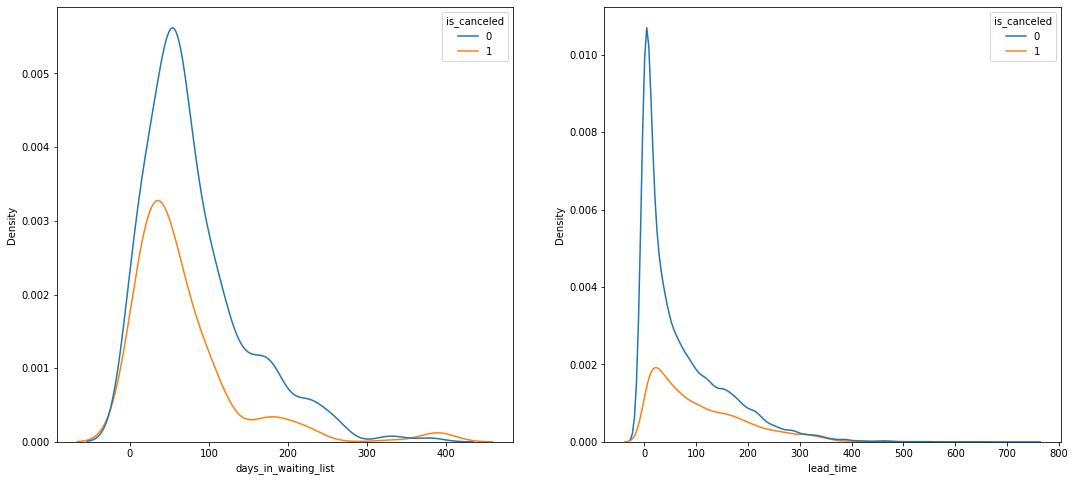

In [ ]:
waiting_bookings = data[data['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = data['lead_time'], hue = data['is_canceled'])
plt.show()

**Insights**

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. \ \ Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

# **Summary**

Travel and hospitality is one of the most lucrative industries which always have something new to offer to guests. Year-on-year the industry witnesses a rise in travellers globally.Running a hotel business isn’t a cakewalk. The level of risk involved is immense.COVID-19 has also affected every sector across the globe, and the hotel industry is among the hardest hit in last two years.

Therefore, hoteliers must keep an eye on every hurdle that comes in the way.

Numerous hotels around the world tend to overlook most of the challenges. As a result, they face serious repercussions.

This dataset contains booking information for a city hotel and a resort hotel over many countries.To overcome these challenges first we need to analyze the data and visualize and make proper decisons to help hotel industry.

Here, I come across The cancellation rate of city hotel is higher than the Resort Hotels.  Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel. visitors who had 1 or 2 children also preferred city hotel.Change in guest expectations is one of the biggest problems in the hotel industry. You’ve witnessed that nowadays guests demand a lot more from the hotel. Free WiFi, entertainment system, unique stay experience, and swift check-in check-out services.So, contactless hotel services can be provided with the right technology. Consider deploying a self-service guest portal that will facilitate quick check-in check-out services. Like these lot many improvements can be made by analysing the data.

# **Conclusion**
1.Resort hotel has almost double percentage than city hotel.

2.August month has highest number of booking and january month has     lowest number of booking.

3.2016 has higher bookings than 2015 and 2017.

From 2015 number of bookings increases in 2016 but booking decreases in 2017.

4.From above graph we can say that Online booking has almost same as sum of other mode of bookings.

5.Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

6.PRT has highest number of booking.

7.Resort hotel has maximum cancellation than city hotel.

8.Agent no. 9 has made most no. of bookings.


9.Most of the customers come from Portugal, Great Britain, France and Spain.

10.Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

11.Almost 30 % of City Hotel bookings got canceled.

12.TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

13.GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

14.We can see that graph Arrival_num has small peaks at regular interval of days. This can be due to increase in arrival weekend.\ \ Also the avg adr tends to go up as month ends. Therefore charge more at the end of month.

15.Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that)

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

16.We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. \ \ Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.